# Predictive Statistical Analysis for the Parkinson disease

### Goal: 
1. At baseline, determine what are factors that predict clinical progression?
2. What are the sub-types of Parkinson’s disease based on clinical, molecular and imaging data?

### Plan:
1. After you add all data, and did clustering, use the following information for better interpretations:
    * Clinical_Diagnosis_and_Management.csv: SWEED assesment there is a page asking for confidece levels
    * Concomitant_Medications.csv: drug use, very good indicator of noise in the groups
    * Current_Medical_Conditions_Log.csv: good medical information to clear out outliers
    * Surgery_for_Parkinson_Disease.csv: few have had the surgery, use with outliers

### Summary of results so far: 
* Nothing significant 

## 1. Data load and cleansing

In [2]:
# loading libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
cols = {}
cols["letter_seq"] = ["PATNO", "EVENT_ID","LNS_TOTRAW"]
o = pd.read_csv("../data/Non-motor Assessments/Letter_-_Number_Sequencing__PD_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["letter_seq"])
stai
# stai["total_pos"] = stai[cols["geriatric_pos"]].sum(axis=1)
# stai["total_neg"] = stai[cols["geriatric_neg"]].sum(axis=1)
# stai["total"] = stai["total_pos"] + 5 - stai["total_neg"]
# geriatric = geriatric["total"] # drop the rest

# geriatric["total"] = geriatric["total_pos"] 
# o["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'], 
#                             ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
# o[ o["TESTNAME"].str.contains("CSF") ]

,,a_state,a_trait
PATNO,EVENT_ID,,
3404,BL,-15.0,-9.0
3400,BL,-10.0,13.0
3401,BL,-23.0,-18.0
3405,BL,-19.0,-14.0
3403,BL,2.0,-2.0
3406,BL,-18.0,15.0
3407,BL,-18.0,-15.0
3409,BL,-18.0,-8.0
3410,BL,-20.0,-2.0


In [36]:
## loading data and selecting the necessary columns
## column names
cols = {}
# Biospecimen Analysis
cols["biospecimen"] = ["PATNO", "CLINICAL_EVENT","TYPE", "TESTNAME", "TESTVALUE", "UNITS"]
# Medical
cols["pd_features"] = ["PATNO", "SXMO","SXYEAR", "PDDXDT"] # first symptom onset month, year, diagnosis date 
cols["pd_medication"] = ["PATNO", "EVENT_ID","PDMEDYN","ONLDOPA", "ONDOPAG", "ONOTHER"] # on medication, Levodopa, Dopamine Agonist, other
cols["vital_sign"] = ["PATNO", "EVENT_ID","WGTKG","HTCM"]
# Medical-Neurological Exam
cols["neuro_cranial"] = ["PATNO", "EVENT_ID","CN1RSP", "CN2RSP", "CN346RSP", "CN5RSP", "CN7RSP", "CN8RSP", "CN910RSP", "CN11RSP", "CN12RSP"]
# Medical-Safety Monitoring

# Motor Assessments
cols["updrs1"] = ["PATNO", "EVENT_ID", "INFODT", "NP1COG", "NP1HALL", "NP1DPRS", "NP1ANXS", "NP1APAT", "NP1DDS"]
cols["updrs1pq"] = ["PATNO", "EVENT_ID", "NP1SLPN", "NP1SLPD", "NP1PAIN", "NP1URIN", "NP1CNST", "NP1LTHD", "NP1FATG"]
cols["updrs2pq"] = ["PATNO", "EVENT_ID", "NP2SPCH", "NP2SALV", "NP2SWAL", "NP2EAT", "NP2DRES", "NP2HYGN", "NP2HWRT", "NP2HOBB", "NP2TURN", "NP2TRMR", "NP2RISE", "NP2WALK", "NP2FREZ"]
cols["updrs3_temp"] = ["PATNO", "EVENT_ID", "PAG_NAME", "CMEDTM", "EXAMTM", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON", "DYSKPRES", "DYSKIRAT", "NHY", "ANNUAL_TIME_BTW_DOSE_NUPDRS", "ON_OFF_DOSE", "PD_MED_USE"]
cols["updrs3"] = ["PATNO", "EVENT_ID", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON"]
cols["updrs4"] = ["PATNO", "EVENT_ID", "NP4WDYSK", "NP4DYSKI", "NP4OFF", "NP4FLCTI", "NP4FLCTX", "NP4DYSTN"]
cols["schwab"] = ["PATNO", "EVENT_ID", "MSEADLG"]
cols["pase_house"] = ["PATNO", "EVENT_ID", "LTHSWRK", "HVYHSWRK", "HMREPR", "LAWNWRK", "OUTGARDN", "CAREGVR", "WRKVL", "WRKVLHR", "WRKVLACT"]
# Non-motor Assessments
cols["benton"] = ["PATNO", "EVENT_ID", "JLO_TOTRAW"]
cols["cog_catg"] = ["PATNO", "EVENT_ID", "COGDECLN", "FNCDTCOG", "COGSTATE"]
cols["epworth"] = ["PATNO", "EVENT_ID", "ESS1", "ESS2", "ESS3", "ESS4", "ESS5", "ESS6", "ESS7", "ESS8"]
cols["geriatric"] = ["PATNO", "EVENT_ID", "GDSSATIS", "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSGSPIR", "GDSAFRAD", "GDSHAPPY", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSALIVE", "GDSWRTLS", "GDSENRGY", "GDSHOPLS", "GDSBETER"]
cols["geriatric_pos"] = [ "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSAFRAD", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSWRTLS", "GDSHOPLS", "GDSBETER"]
cols["geriatric_neg"] = [ "GDSSATIS", "GDSGSPIR", "GDSHAPPY", "GDSALIVE", "GDSENRGY"]
cols["hopkins_verbal"] = ["PATNO", "EVENT_ID", "HVLTRT1", "HVLTRT2", "HVLTRT3", "HVLTRDLY", "HVLTREC", "HVLTFPRL", "HVLTFPUN"]
cols["letter_seq"] = ["PATNO", "EVENT_ID","LNS_TOTRAW"]
cols["moca"] = ["PATNO", "EVENT_ID", "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH", "MCALION", "MCARHINO", "MCACAMEL", "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7", "MCASNTNC", "MCAVFNUM", "MCAVF", "MCAABSTR", "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5", "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY", "MCATOT"]
cols["moca_visuospatial"] = [ "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH"]
cols["moca_naming"] = [ "MCALION", "MCARHINO", "MCACAMEL"]
cols["moca_attention"] = [ "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7"]
cols["moca_language"] = [ "MCASNTNC", "MCAVF"]
cols["moca_delayed_recall"] = [ "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5"]
cols["moca_orientation"] = [ "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY"]
cols["upsit"] = [ "SUBJECT_ID", "SCENT_10_RESPONSE", "SCENT_09_RESPONSE", "SCENT_08_RESPONSE", "SCENT_07_RESPONSE", "SCENT_06_RESPONSE", "SCENT_05_RESPONSE", "SCENT_04_RESPONSE", "SCENT_03_RESPONSE", "SCENT_02_RESPONSE", "SCENT_01_RESPONSE", "SCENT_20_RESPONSE", "SCENT_19_RESPONSE", "SCENT_18_RESPONSE", "SCENT_17_RESPONSE", "SCENT_16_RESPONSE", "SCENT_15_RESPONSE", "SCENT_14_RESPONSE", "SCENT_13_RESPONSE", "SCENT_12_RESPONSE", "SCENT_11_RESPONSE", "SCENT_30_RESPONSE", "SCENT_29_RESPONSE", "SCENT_28_RESPONSE", "SCENT_27_RESPONSE", "SCENT_26_RESPONSE", "SCENT_25_RESPONSE", "SCENT_24_RESPONSE", "SCENT_23_RESPONSE", "SCENT_22_RESPONSE", "SCENT_21_RESPONSE", "SCENT_40_RESPONSE", "SCENT_39_RESPONSE", "SCENT_38_RESPONSE", "SCENT_37_RESPONSE", "SCENT_36_RESPONSE", "SCENT_35_RESPONSE", "SCENT_34_RESPONSE", "SCENT_33_RESPONSE", "SCENT_32_RESPONSE", "SCENT_31_RESPONSE", "SCENT_10_CORRECT", "SCENT_09_CORRECT", "SCENT_08_CORRECT", "SCENT_07_CORRECT", "SCENT_06_CORRECT", "SCENT_05_CORRECT", "SCENT_04_CORRECT", "SCENT_03_CORRECT", "SCENT_02_CORRECT", "SCENT_01_CORRECT", "SCENT_20_CORRECT", "SCENT_19_CORRECT", "SCENT_18_CORRECT", "SCENT_17_CORRECT", "SCENT_16_CORRECT", "SCENT_15_CORRECT", "SCENT_14_CORRECT", "SCENT_13_CORRECT", "SCENT_12_CORRECT", "SCENT_11_CORRECT", "SCENT_30_CORRECT", "SCENT_29_CORRECT", "SCENT_28_CORRECT", "SCENT_27_CORRECT", "SCENT_26_CORRECT", "SCENT_25_CORRECT", "SCENT_24_CORRECT", "SCENT_23_CORRECT", "SCENT_22_CORRECT", "SCENT_21_CORRECT", "SCENT_40_CORRECT", "SCENT_39_CORRECT", "SCENT_38_CORRECT", "SCENT_37_CORRECT", "SCENT_36_CORRECT", "SCENT_35_CORRECT", "SCENT_34_CORRECT", "SCENT_33_CORRECT", "SCENT_32_CORRECT", "SCENT_31_CORRECT", "TOTAL_CORRECT"]
cols["quip"] = [ "PATNO", "EVENT_ID", "TMGAMBLE", "CNTRLGMB", "TMSEX", "CNTRLSEX", "TMBUY", "CNTRLBUY", "TMEAT", "CNTRLEAT", "TMTORACT", "TMTMTACT", "TMTRWD" ]
cols["rem"] = [ "PATNO", "EVENT_ID", "DRMVIVID", "DRMAGRAC", "DRMNOCTB", "SLPLMBMV", "SLPINJUR", "DRMVERBL", "DRMFIGHT", "DRMUMV", "DRMOBJFL", "MVAWAKEN", "DRMREMEM", "SLPDSTRB", "STROKE", "HETRA", "RLS", "NARCLPSY", "DEPRS", "EPILEPSY", "BRNINFM" ]
cols["aut"] = [ "PATNO", "EVENT_ID", "SCAU1", "SCAU2", "SCAU3", "SCAU4", "SCAU5", "SCAU6", "SCAU7", "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13", "SCAU14", "SCAU15", "SCAU16", "SCAU17", "SCAU18", "SCAU19", "SCAU20", "SCAU21", "SCAU22", "SCAU23", "SCAU23A", "SCAU23AT", "SCAU24", "SCAU25", "SCAU26A", "SCAU26AT", "SCAU26B", "SCAU26BT", "SCAU26C", "SCAU26CT", "SCAU26D", "SCAU26DT" ]
cols["aut_gastrointestinal_up"] = [ "SCAU1", "SCAU2", "SCAU3" ]
cols["aut_gastrointestinal_down"] = [ "SCAU4", "SCAU5", "SCAU6", "SCAU7" ]
cols["aut_urinary"] = [ "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13" ] 
cols["aut_cardiovascular"] = [  "SCAU14", "SCAU15", "SCAU16" ]
cols["aut_thermoregulatory"] = [ "SCAU17", "SCAU18" ]
cols["aut_pupillomotor"] = [ "SCAU19" ]
cols["aut_skin"] = [ "SCAU20", "SCAU21" ]
cols["aut_sexual"] = [ "SCAU22", "SCAU23", "SCAU24", "SCAU25"] # 9 for NA, might skew the results signific for M/F better to remove
cols["semantic"] = [ "PATNO", "EVENT_ID", "VLTANIM", "VLTVEG", "VLTFRUIT" ]
cols["stai"] = [ "PATNO", "EVENT_ID", "STAIAD1", "STAIAD2", "STAIAD3", "STAIAD4", "STAIAD5", "STAIAD6", "STAIAD7", "STAIAD8", "STAIAD9", "STAIAD10", "STAIAD11", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD15", "STAIAD16", "STAIAD17", "STAIAD18", "STAIAD19", "STAIAD20", "STAIAD21", "STAIAD22", "STAIAD23", "STAIAD24", "STAIAD25", "STAIAD26", "STAIAD27", "STAIAD28", "STAIAD29", "STAIAD30", "STAIAD31", "STAIAD32", "STAIAD33", "STAIAD34", "STAIAD35", "STAIAD36", "STAIAD37", "STAIAD38", "STAIAD39", "STAIAD40" ]
cols["stai_a_state_pos"] = ["STAIAD3", "STAIAD4", "STAIAD6", "STAIAD7", "STAIAD9", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD17", "STAIAD18"]
cols["stai_a_state_neg"] = ["STAIAD1", "STAIAD2", "STAIAD5",  "STAIAD8", "STAIAD10", "STAIAD11", "STAIAD15", "STAIAD16", "STAIAD19", "STAIAD20"]
cols["stai_a_trait_pos"] = ["STAIAD22", "STAIAD24", "STAIAD25", "STAIAD28", "STAIAD29", "STAIAD31", "STAIAD32", "STAIAD35", "STAIAD37", "STAIAD38", "STAIAD40"]
cols["stai_a_trait_neg"] = ["STAIAD21", "STAIAD23", "STAIAD26", "STAIAD27", "STAIAD30", "STAIAD33", "STAIAD34", "STAIAD36", "STAIAD39"]
cols["sdm"] = [ "PATNO", "EVENT_ID", "SDMTOTAL"] 
cols["upsit_booklet"] = [ "PATNO", "EVENT_ID", "UPSITBK1", "UPSITBK2", "UPSITBK3", "UPSITBK4" ]
# Subject Characteristics
cols["family_history"] = ["PATNO", "BIOMOM", "BIOMOMPD", "BIODAD", "BIODADPD", "FULSIB", "FULSIBPD", "HAFSIB", "HAFSIBPD", "MAGPAR", "MAGPARPD", "PAGPAR", "PAGPARPD", "MATAU", "MATAUPD", "PATAU", "PATAUPD", "KIDSNUM", "KIDSPD"]
cols["status"] = ["PATNO", "RECRUITMENT_CAT", "IMAGING_CAT", "ENROLL_DATE", "ENROLL_CAT"]
cols["screening"] = ["PATNO", "BIRTHDT", "GENDER", "APPRDX", "CURRENT_APPRDX", "HISPLAT", "RAINDALS", "RAASIAN", "RABLACK", "RAHAWOPI", "RAWHITE", "RANOS"]
cols["socio"] = [ "PATNO", "EDUCYRS", "HANDED" ]
# Subject Enrollment
cols["primary_diag"] = [ "PATNO", "PRIMDIAG" ]

## data load
# Biospecimen Analysis
biospecimen = pd.read_csv("../data/Biospecimen Analysis/Biospecimen_Analysis_Results.csv", index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'], \
                            ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={"CLINICAL_EVENT":'EVENT_ID'}, inplace=True)
# Medical
pd_start = pd.read_csv("../data/Medical/PD_Features.csv", index_col=["PATNO"], usecols=cols["pd_features"])
pd_medication = pd.read_csv("../data/Medical/Use_of_PD_Medication.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["pd_medication"])
vital_signs = pd.read_csv("../data/Medical/Vital_Signs.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["vital_sign"])
# Medical-Neurological Exam
neuro_cranial = pd.read_csv("../data/Medical-Neurological Exam/Neurological_Exam_-_Cranial_Nerves.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["neuro_cranial"])
# Medical-Safety Monitoring

# Motor Assessments
updrs1 = pd.read_csv("../data/Motor Assessments/MDS_UPDRS_Part_I.csv", index_col=["PATNO", "EVENT_ID"], parse_dates=["INFODT"], usecols=cols["updrs1"])
updrs1pq = pd.read_csv("../data/Motor Assessments/MDS_UPDRS_Part_I__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs1pq"])
updrs2pq = pd.read_csv("../data/Motor Assessments/MDS_UPDRS_Part_II__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs2pq"])
updrs3_temp = pd.read_csv("../data/Motor Assessments/MDS_UPDRS_Part_III__Post_Dose_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs3_temp"])
updrs3 = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3'] # before dose
updrs3a = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3A'] # after dose 
updrs4 = pd.read_csv("../data/Motor Assessments/MDS_UPDRS_Part_IV.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs4"])
schwab = pd.read_csv("../data/Motor Assessments/Modified_Schwab_+_England_ADL.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["schwab"])
pase_house = pd.read_csv("../data/Motor Assessments/PASE_-_Household_Activity.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["pase_house"])
# Non-motor Assessments
benton = pd.read_csv("../data/Non-motor Assessments/Benton_Judgment_of_Line_Orientation.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["benton"])
cog_catg = pd.read_csv("../data/Non-motor Assessments/Cognitive_Categorization.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["cog_catg"])
epworth = pd.read_csv("../data/Non-motor Assessments/Epworth_Sleepiness_Scale.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["epworth"])
geriatric = pd.read_csv("../data/Non-motor Assessments/Geriatric_Depression_Scale__Short_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["geriatric"])
geriatric["total_pos"] = geriatric[cols["geriatric_pos"]].sum(axis=1)
geriatric["total_neg"] = geriatric[cols["geriatric_neg"]].sum(axis=1)
geriatric["total"] = geriatric["total_pos"] + 5 - geriatric["total_neg"]
geriatric = geriatric["total"] # drop the rest
hopkins_verbal = pd.read_csv("../data/Non-motor Assessments/Hopkins_Verbal_Learning_Test.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["hopkins_verbal"])
letter_seq = pd.read_csv("../data/Non-motor Assessments/Letter_-_Number_Sequencing__PD_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["letter_seq"])
moca = pd.read_csv("../data/Non-motor Assessments/Montreal_Cognitive_Assessment__MoCA_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["moca"])
moca["visuospatial"] = moca[cols["moca_visuospatial"]].sum(axis=1)
moca["naming"] = moca[cols["moca_naming"]].sum(axis=1)
moca["attention"] = moca[cols["moca_attention"]].sum(axis=1)
moca["language"] = moca[cols["moca_language"]].sum(axis=1)
moca["delayed_recall"] = moca[cols["moca_delayed_recall"]].sum(axis=1)
moca = moca[["visuospatial", "naming", "attention", "language", "delayed_recall", "MCAABSTR", "MCAVFNUM", "MCATOT"]] # drop extra
upsit = pd.read_csv("../data/Non-motor Assessments/Olfactory_UPSIT.csv", index_col=["SUBJECT_ID"], usecols=cols["upsit"])
quip = pd.read_csv("../data/Non-motor Assessments/QUIP_Current_Short.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["quip"])
rem = pd.read_csv("../data/Non-motor Assessments/REM_Sleep_Disorder_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["rem"])
aut = pd.read_csv("../data/Non-motor Assessments/SCOPA-AUT.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["aut"])
aut["gastrointestinal_up"] = aut[cols["aut_gastrointestinal_up"]].sum(axis=1)
aut["gastrointestinal_down"] = aut[cols["aut_gastrointestinal_down"]].sum(axis=1)
aut["urinary"] = aut[cols["aut_urinary"]].sum(axis=1)
aut["cardiovascular"] = aut[cols["aut_cardiovascular"]].sum(axis=1)
aut["thermoregulatory"] = aut[cols["aut_thermoregulatory"]].sum(axis=1)
aut["pupillomotor"] = aut[cols["aut_pupillomotor"]].sum(axis=1)
aut["skin"] = aut[cols["aut_skin"]].sum(axis=1)
aut["sexual"] = aut[cols["aut_sexual"]].sum(axis=1)
aut = aut[["gastrointestinal_up", "gastrointestinal_down", "urinary", "cardiovascular", "thermoregulatory", "pupillomotor", "skin", "sexual"]]
semantic = pd.read_csv("../data/Non-motor Assessments/Semantic_Fluency.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["semantic"])
stai = pd.read_csv("../data/Non-motor Assessments/State-Trait_Anxiety_Inventory.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["stai"])
stai["a_state"] = stai[cols["stai_a_state_pos"]].sum(axis=1) + (5 * len(cols["stai_a_state_neg"]) - stai[cols["stai_a_state_neg"]].sum(axis=1))
stai["a_trait"] = stai[cols["stai_a_trait_pos"]].sum(axis=1) + (5 * len(cols["stai_a_trait_neg"]) - stai[cols["stai_a_trait_neg"]].sum(axis=1))
stai = stai[["a_state", "a_trait"]]
sdm = pd.read_csv("../data/Non-motor Assessments/Symbol_Digit_Modalities.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["sdm"])
upsit_booklet = pd.read_csv("../data/Non-motor Assessments/University_of_Pennsylvania_Smell_ID_Test.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["upsit_booklet"])
# Subject Characteristics
family_history = pd.read_csv("../data/Subject Characteristics/Family_History__PD_.csv", index_col=["PATNO"], usecols=cols["family_history"])
status = pd.read_csv("../data/Subject Characteristics/Patient_Status.csv", index_col=["PATNO"], usecols=cols["status"])
screening = pd.read_csv("../data/Subject Characteristics/Screening___Demographics.csv", index_col=["PATNO"], usecols=cols["screening"])
socio = pd.read_csv("../data/Subject Characteristics/Socio-Economics.csv", index_col=["PATNO"], usecols=cols["socio"])
# Subject Enrollment
primary_diag = pd.read_csv("../data/Subject Enrollment/Primary_Diagnosis.csv", index_col=["PATNO"], usecols=cols["primary_diag"])


In [3]:
# selecting participants with data from BL to last_visit
last_visit = 'V06'
t1 = updrs1.reset_index()[ updrs1.reset_index().EVENT_ID == last_visit ]['PATNO']
t2 = updrs1pq.reset_index()[ updrs1pq.reset_index().EVENT_ID == last_visit ]['PATNO']
t3 = updrs2pq.reset_index()[ updrs2pq.reset_index().EVENT_ID == last_visit ]['PATNO']
t4 = updrs3.reset_index()[ updrs3.reset_index().EVENT_ID == last_visit ]['PATNO']
t5 = updrs3a.reset_index()[ updrs3a.reset_index().EVENT_ID == last_visit ]['PATNO'] # do not include only after dose
t6 = updrs4.reset_index()[ updrs4.reset_index().EVENT_ID == last_visit ]['PATNO'] # do not include only PD
t7 = epworth.reset_index()[ epworth.reset_index().EVENT_ID == last_visit ]['PATNO']
t8 = moca.reset_index()[ moca.reset_index().EVENT_ID == last_visit ]['PATNO']
t9 = schwab.reset_index()[ schwab.reset_index().EVENT_ID == last_visit ]['PATNO'] # do not include only PD
t10 = pase_house.reset_index()[ pase_house.reset_index().EVENT_ID == last_visit ]['PATNO'] # making HC more scattered 
t11 = benton.reset_index()[ benton.reset_index().EVENT_ID == last_visit ]['PATNO']
t12 = cog_catg.reset_index()[ cog_catg.reset_index().EVENT_ID == last_visit ]['PATNO']
# t12 = geriatric.reset_index()[ geriatric.reset_index().EVENT_ID == last_visit ]['PATNO']
patno_filtered_visited = t1[t1.isin(t2) & t1.isin(t3) & t1.isin(t4) & t1.isin(t7) & t1.isin(t8) & t1.isin(t11) & t1.isin(t12)]
                            #& t1.isin(t5) & t1.isin(t6) & t1.isin(t9) ]  # do not include, only PD
                            # & t1.isin(t10)] #adds noise to HC
interest_visits = ['BL', 'V01', 'V02', 'V03', 'V04', 'V05', 'V06']#, 'V07', 'V08', 'V09', 'V10']

# constructing the data_visits dictionary with all the information
data_visits = {}
status_o = status[status.index.isin(patno_filtered_visited)].ENROLL_CAT
screening_o = screening[screening.index.isin(patno_filtered_visited)]
data_visits["info"] = pd.concat([status_o, screening_o], axis=1)
data_visits["updrs1"] = updrs1.reset_index()[ updrs1.reset_index()['PATNO'].isin(patno_filtered_visited) & updrs1.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["updrs1pq"] = updrs1pq.reset_index()[ updrs1pq.reset_index()['PATNO'].isin(patno_filtered_visited) & updrs1pq.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["updrs2pq"] = updrs2pq.reset_index()[ updrs2pq.reset_index()['PATNO'].isin(patno_filtered_visited) & updrs2pq.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["updrs3"] = updrs3.reset_index()[ updrs3.reset_index()['PATNO'].isin(patno_filtered_visited) & updrs3.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["updrs3a"] = updrs3a.reset_index()[ updrs3a.reset_index()['PATNO'].isin(patno_filtered_visited) & updrs3a.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["updrs4"] = updrs4.reset_index()[ updrs4.reset_index()['PATNO'].isin(patno_filtered_visited) & updrs4.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["schwab"] = schwab.reset_index()[ schwab.reset_index()['PATNO'].isin(patno_filtered_visited) & schwab.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["pase_house"] = pase_house.reset_index()[ pase_house.reset_index()['PATNO'].isin(patno_filtered_visited) & pase_house.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["epworth"] = epworth.reset_index()[ epworth.reset_index()['PATNO'].isin(patno_filtered_visited) & epworth.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["moca"] = moca.reset_index()[ moca.reset_index()['PATNO'].isin(patno_filtered_visited) & moca.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["benton"] = benton.reset_index()[ benton.reset_index()['PATNO'].isin(patno_filtered_visited) & benton.reset_index()['EVENT_ID'].isin(interest_visits)]
data_visits["cog_catg"] = cog_catg.reset_index()[ cog_catg.reset_index()['PATNO'].isin(patno_filtered_visited) & cog_catg.reset_index()['EVENT_ID'].isin(interest_visits)]
# data_visits["geriatric"] = geriatric.reset_index()[ geriatric.reset_index()['PATNO'].isin(patno_filtered_visited) & geriatric.reset_index()['EVENT_ID'].isin(interest_visits)]

What data is avaialble:

In [4]:
data_visits["cog_catg"].shape
cog_catg.shape

(2852, 3)

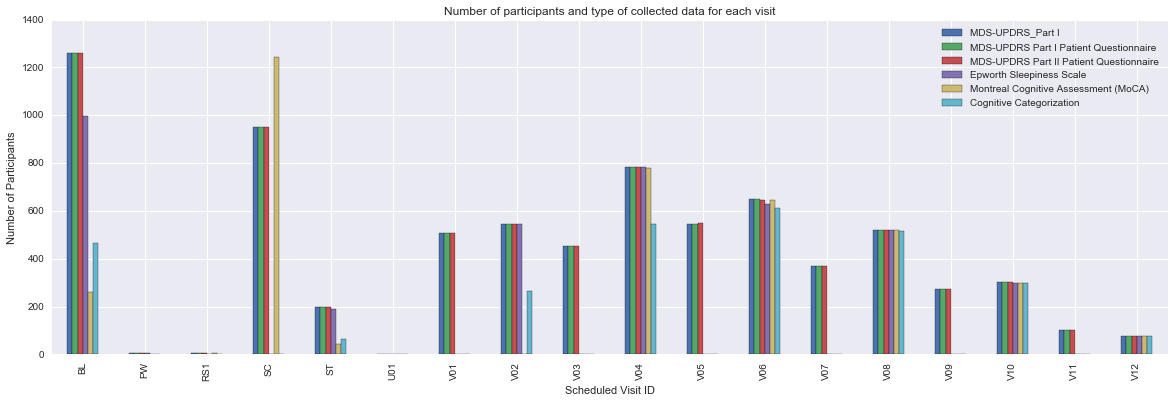

In [5]:
a = updrs1.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'MDS-UPDRS_Part I'})
b = updrs1pq.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'MDS-UPDRS Part I Patient Questionnaire'})
c = updrs2pq.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'MDS-UPDRS Part II Patient Questionnaire'})
d = epworth.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'Epworth Sleepiness Scale'})
e = moca.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'Montreal Cognitive Assessment (MoCA)'})
f = cog_catg.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'Cognitive Categorization'})

plot = a.merge(b, on='EVENT_ID', how='outer').merge(c, on='EVENT_ID', how='outer').merge(d, on='EVENT_ID', how='outer').merge(e, on='EVENT_ID', how='outer').merge(f, on='EVENT_ID', how='outer').set_index('EVENT_ID').plot(kind='bar', title="Number of participants and type of collected data for each visit", figsize=(20, 6))
plot.set_ylabel("Number of Participants");
plot.set_xlabel("Scheduled Visit ID");

Let's see what percentage of selected participants are __PD__, __SWEDD__, __Healthy Control__, and how the __gender__ and __birthdate__ looks like:

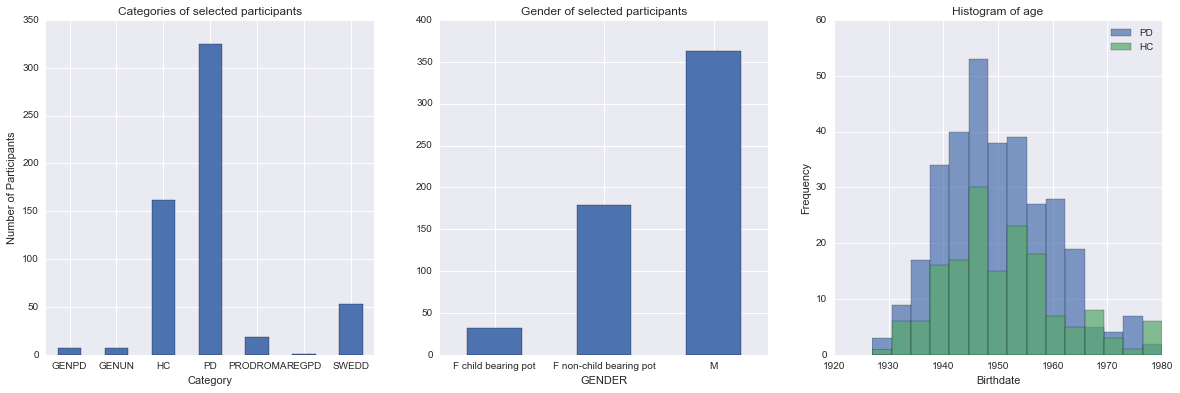

In [6]:
plt.figure(1, figsize=(20, 6))

# plot the categories distribution
plt.subplot(1,3,1)
plot_1 = data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size().plot(kind='bar', title="Categories of selected participants", rot=0, ax=plt.gca())
plot_1.set_ylabel("Number of Participants"); plot_1.set_xlabel("Category");

# plot the gender distribution
plt.subplot(1,3,2)
data_visits["info"].GENDER.replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M']).reset_index().groupby("GENDER").size().plot(kind='bar', title="Gender of selected participants", rot=0, ax=plt.gca());

# plot the age histogram
plt.subplot(1,3,3)
hc_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'HC'].rename(columns={'BIRTHDT':'HC'})
pd_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].rename(columns={'BIRTHDT':'PD'})
concat_birthdt = pd.concat([pd_birthdt.PD, hc_birthdt.HC], axis=1)
plot_3 = concat_birthdt.plot(kind='hist', title="Histogram of age", alpha=0.7, bins=15, ax=plt.gca())
plot_3.set_xlabel("Birthdate");

## 3. Reshape time-series data into one series

In [7]:
t1 = data_visits['updrs1'].drop('INFODT',axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t2 = data_visits['updrs1pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t3 = data_visits['updrs2pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t4 = data_visits['updrs3'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t5 = data_visits['epworth'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t6 = data_visits['moca'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t7 = data_visits['benton'].drop_duplicates(['PATNO','EVENT_ID'], keep='first').set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t8 = data_visits['cog_catg'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# only PD
t10 = data_visits['updrs3a'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t11 = data_visits['updrs4'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t12 = data_visits['schwab'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# chores
t15 = data_visits['pase_house'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

M = pd.concat([t1, t2, t3, t4, t5, t6, t8 ], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')
# only looking at updrs3 we can clearly see two classes of PD
# the primary progression was seen by updrs1, updrs1pq, updrs2pq, updrs3, moca, epworth t1-t6

## 4. Use various dimension reduction algs to observe visual patterns 

In [8]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_2 = sklearnPCA(n_components=2)
M_pca_2 = sklearn_pca_2.fit_transform(M)

from sklearn import decomposition
model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
W_NMF = model_NMF.fit_transform(M)
W_NMF3 = model_NMF3.fit_transform(M)

model_ICA = decomposition.FastICA(n_components=2)
W_ICA = model_ICA.fit_transform(M)

# PCA dimension reduction for PD data
# M_feature[ data_visits["info"].ENROLL_CAT == "PD"]
M_cat = pd.concat([M, data_visits["info"].ENROLL_CAT], axis=1)
M_PD = M_cat[ M_cat.ENROLL_CAT == "PD" ].drop('ENROLL_CAT', axis=1)
M_PD_pca_2 = sklearn_pca_2.fit_transform( M_PD )

# NMF dimension reduction for PD data
W_PD_NMF = model_NMF.fit_transform(M_PD)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

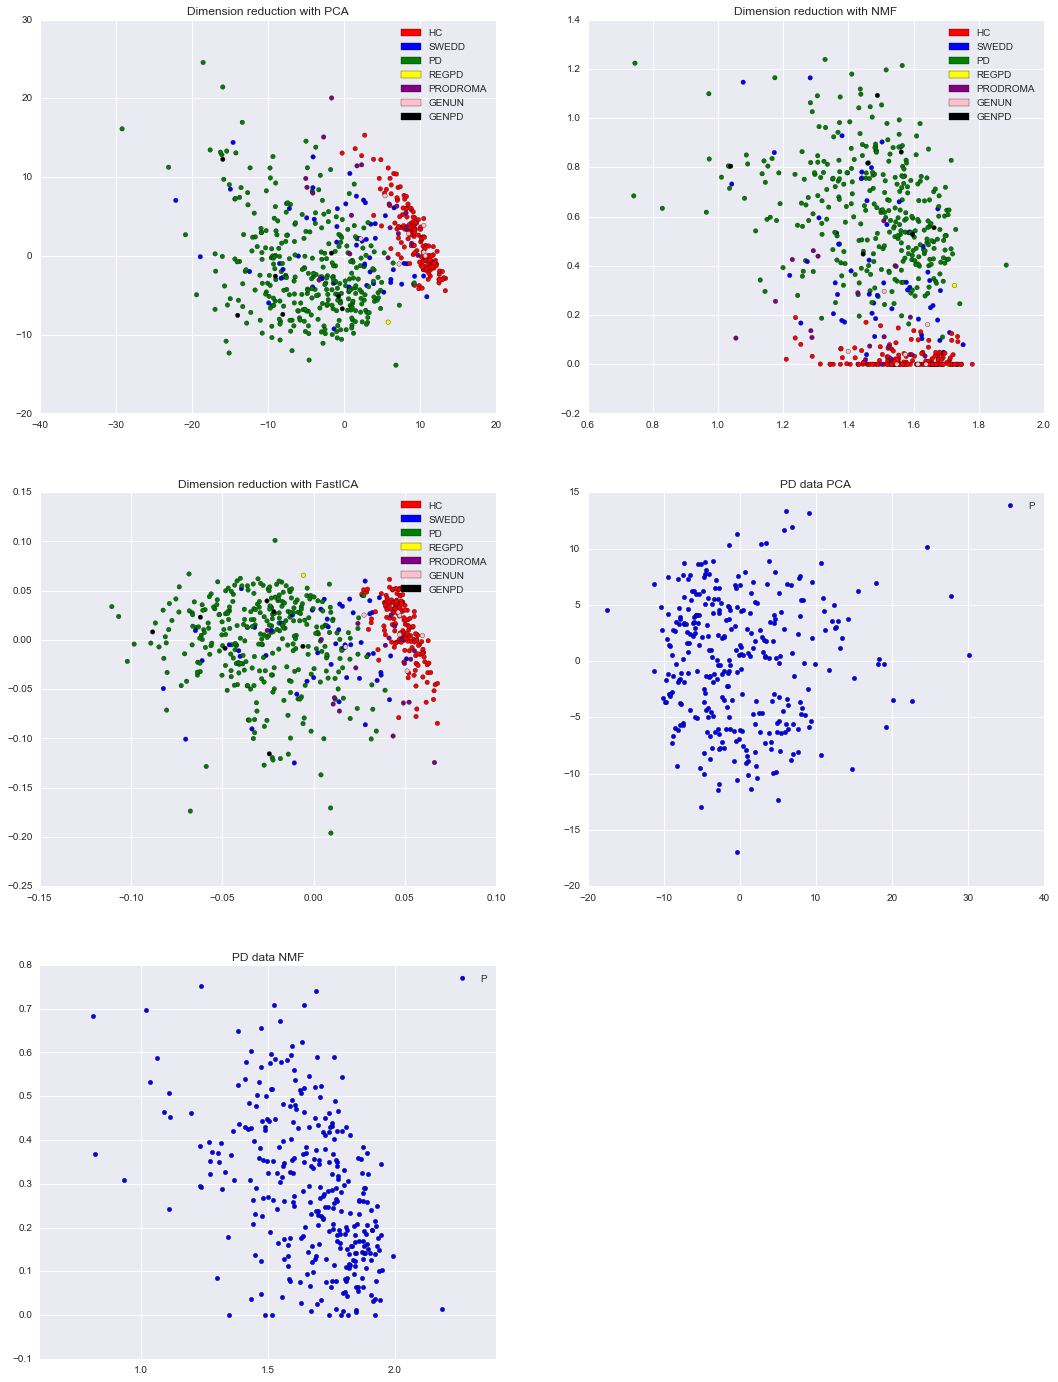

In [35]:
# plot the PCA 2 color makrked with participants' "categories", and "gender"
%matplotlib inline
plt.figure(1, figsize=(18, 24))
## color marked with categories 
plt.subplot(3,2,1)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_pca_2[:, 0], M_pca_2[:, 1], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with PCA')


## color marked with categories 
plt.subplot(3,2,2)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(W_NMF[:, 0], W_NMF[:, 1], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with NMF')

## color marked with categories 
plt.subplot(3,2,3)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(W_ICA[:, 0], W_ICA[:, 1], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with FastICA')

## PD data PCA
plt.subplot(3,2,4)

plot_3 = plt.scatter(M_PD_pca_2[:, 0], M_PD_pca_2[:, 1])
plt.title('PD data PCA')
plt.legend('PD', loc='best');

## PD data NMF
plt.subplot(3,2,5)

plot_3 = plt.scatter(W_PD_NMF[:, 0], W_PD_NMF[:, 1])
plt.title('PD data NMF')
plt.legend('PD', loc='best');

## 4. PCA in 3D

<IPython.core.display.Javascript object>


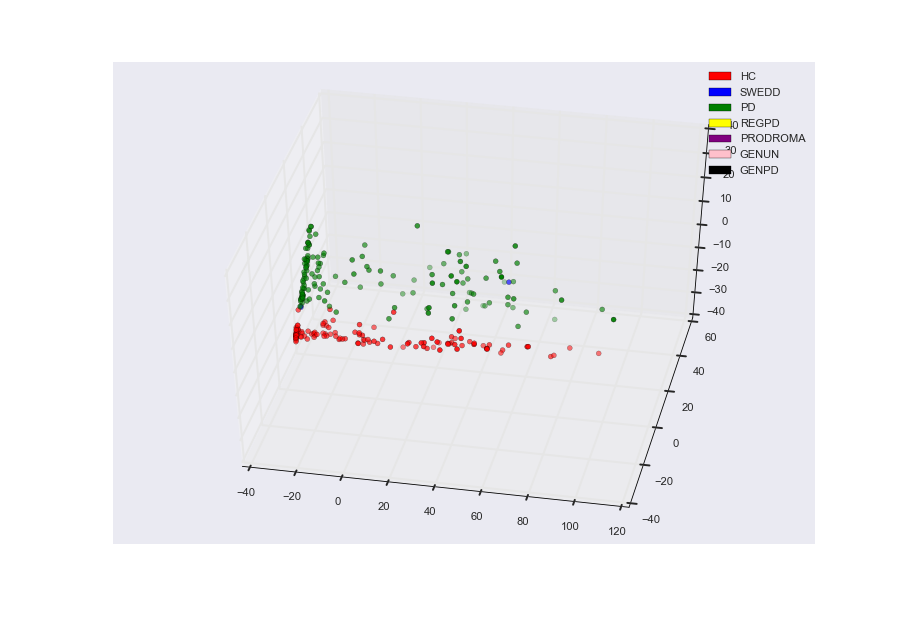

In [164]:
# PCA dimension reduction to 3 dims
sklearn_pca_3 = sklearnPCA(n_components=3)
M_pca_3 = sklearn_pca_3.fit_transform(M)

# plot the PCA 3 color makrked with participants' "categories"
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter(M_pca_3[:, 0], M_pca_3[:, 1], M_pca_3[:, 2], c = colors_categories)
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');


## 6. Build a classifier using Linear Discriminant Analysis (LDA)

In [40]:
# Source: http://sebastianraschka.com/Articles/2014_python_lda.html
# LDA dimension reduction to 2 dims
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda_2 = LDA(n_components=2)
y = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['1', '2', '3', '4', '5', '6', '7'])
X_lda_sklearn = sklearn_lda_2.fit_transform(M, y)

/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


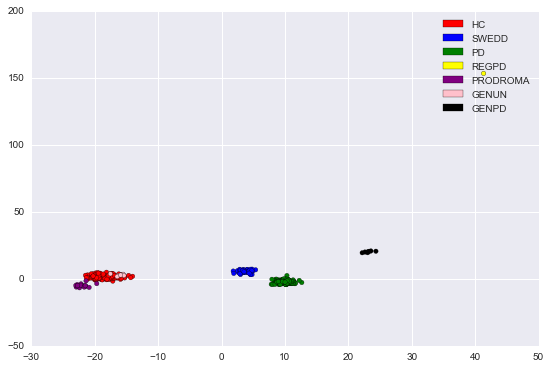

In [51]:
# plot the PCA 2 color makrked with participants' "categories", and "gender"
%matplotlib inline
plt.figure(1, figsize=(20, 6))
## color marked with categories 
plt.subplot(1,2,1)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(X_lda_sklearn[:, 0], X_lda_sklearn[:, 1], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

## 7. Try NMF

In [68]:
from sklearn import decomposition
model = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
W = model.fit_transform(M)
W3 = model3.fit_transform(M)

<IPython.core.display.Javascript object>


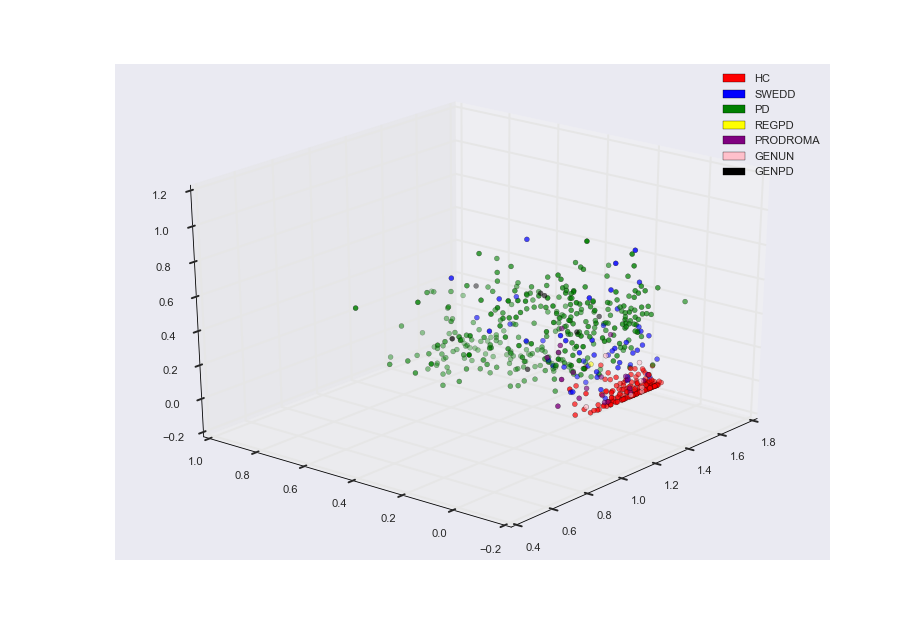

In [79]:
# PCA dimension reduction to 3 dims
sklearn_pca_3 = sklearnPCA(n_components=3)
M_pca_3 = sklearn_pca_3.fit_transform(M)

# plot the PCA 3 color makrked with participants' "categories"
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter(W3[:, 0], W3[:, 1], W3[:, 2], c = colors_categories)
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

